# Import necessary libraries

In [676]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading Dataset

In [677]:
df = pd.read_csv(r'C:\Users\Mahad Mirza\wineDataSet.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [678]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6463 entries, 0 to 6462
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 606.0 KB


In [679]:
# Checking for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

### Checking outliers

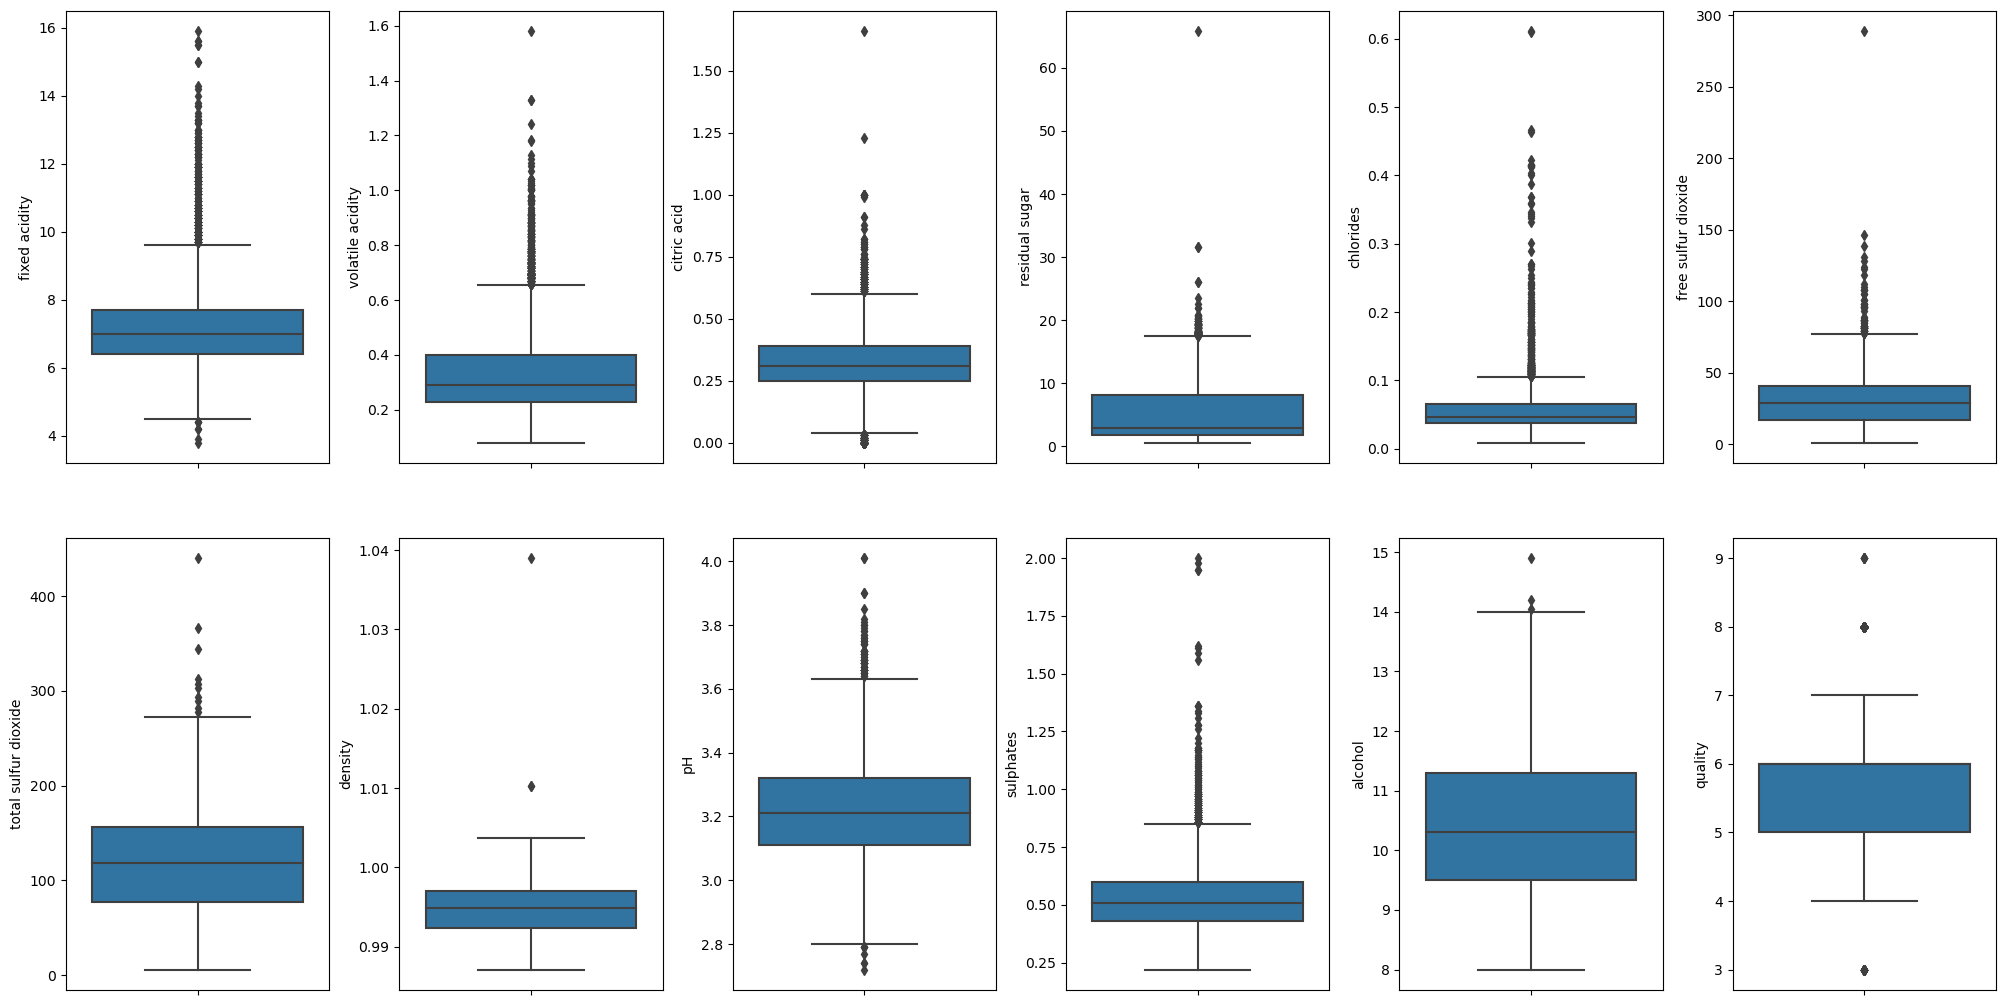

In [680]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#### Exploring distribution plots of numerical attributes

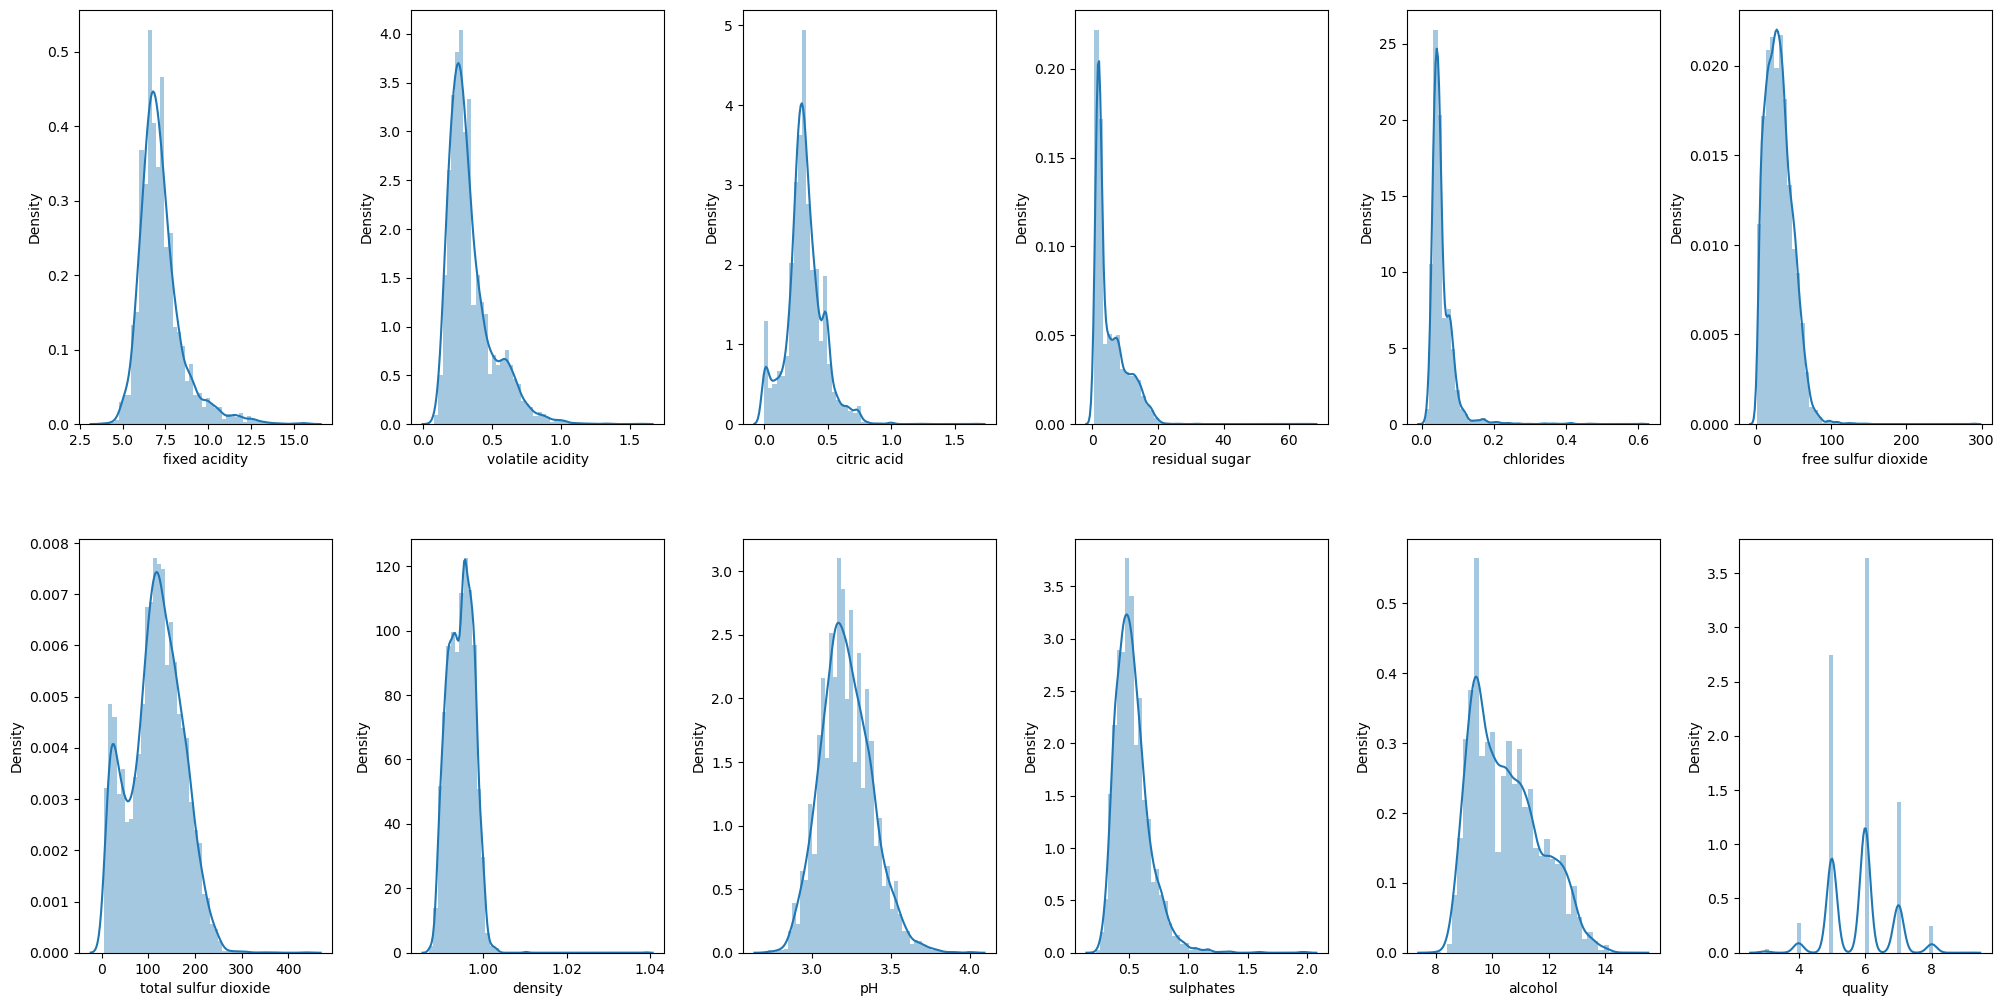

In [681]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

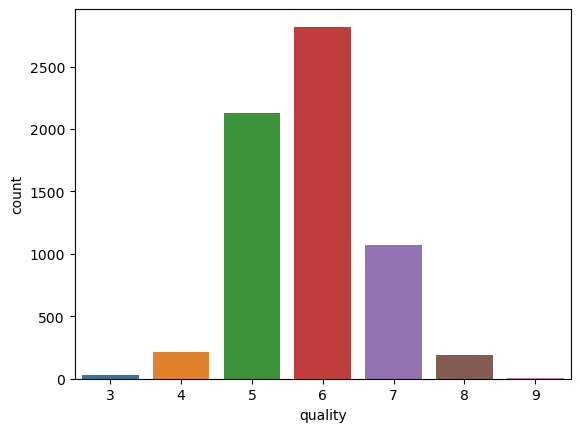

In [682]:
sns.countplot(x='quality', data=df)
plt.show()

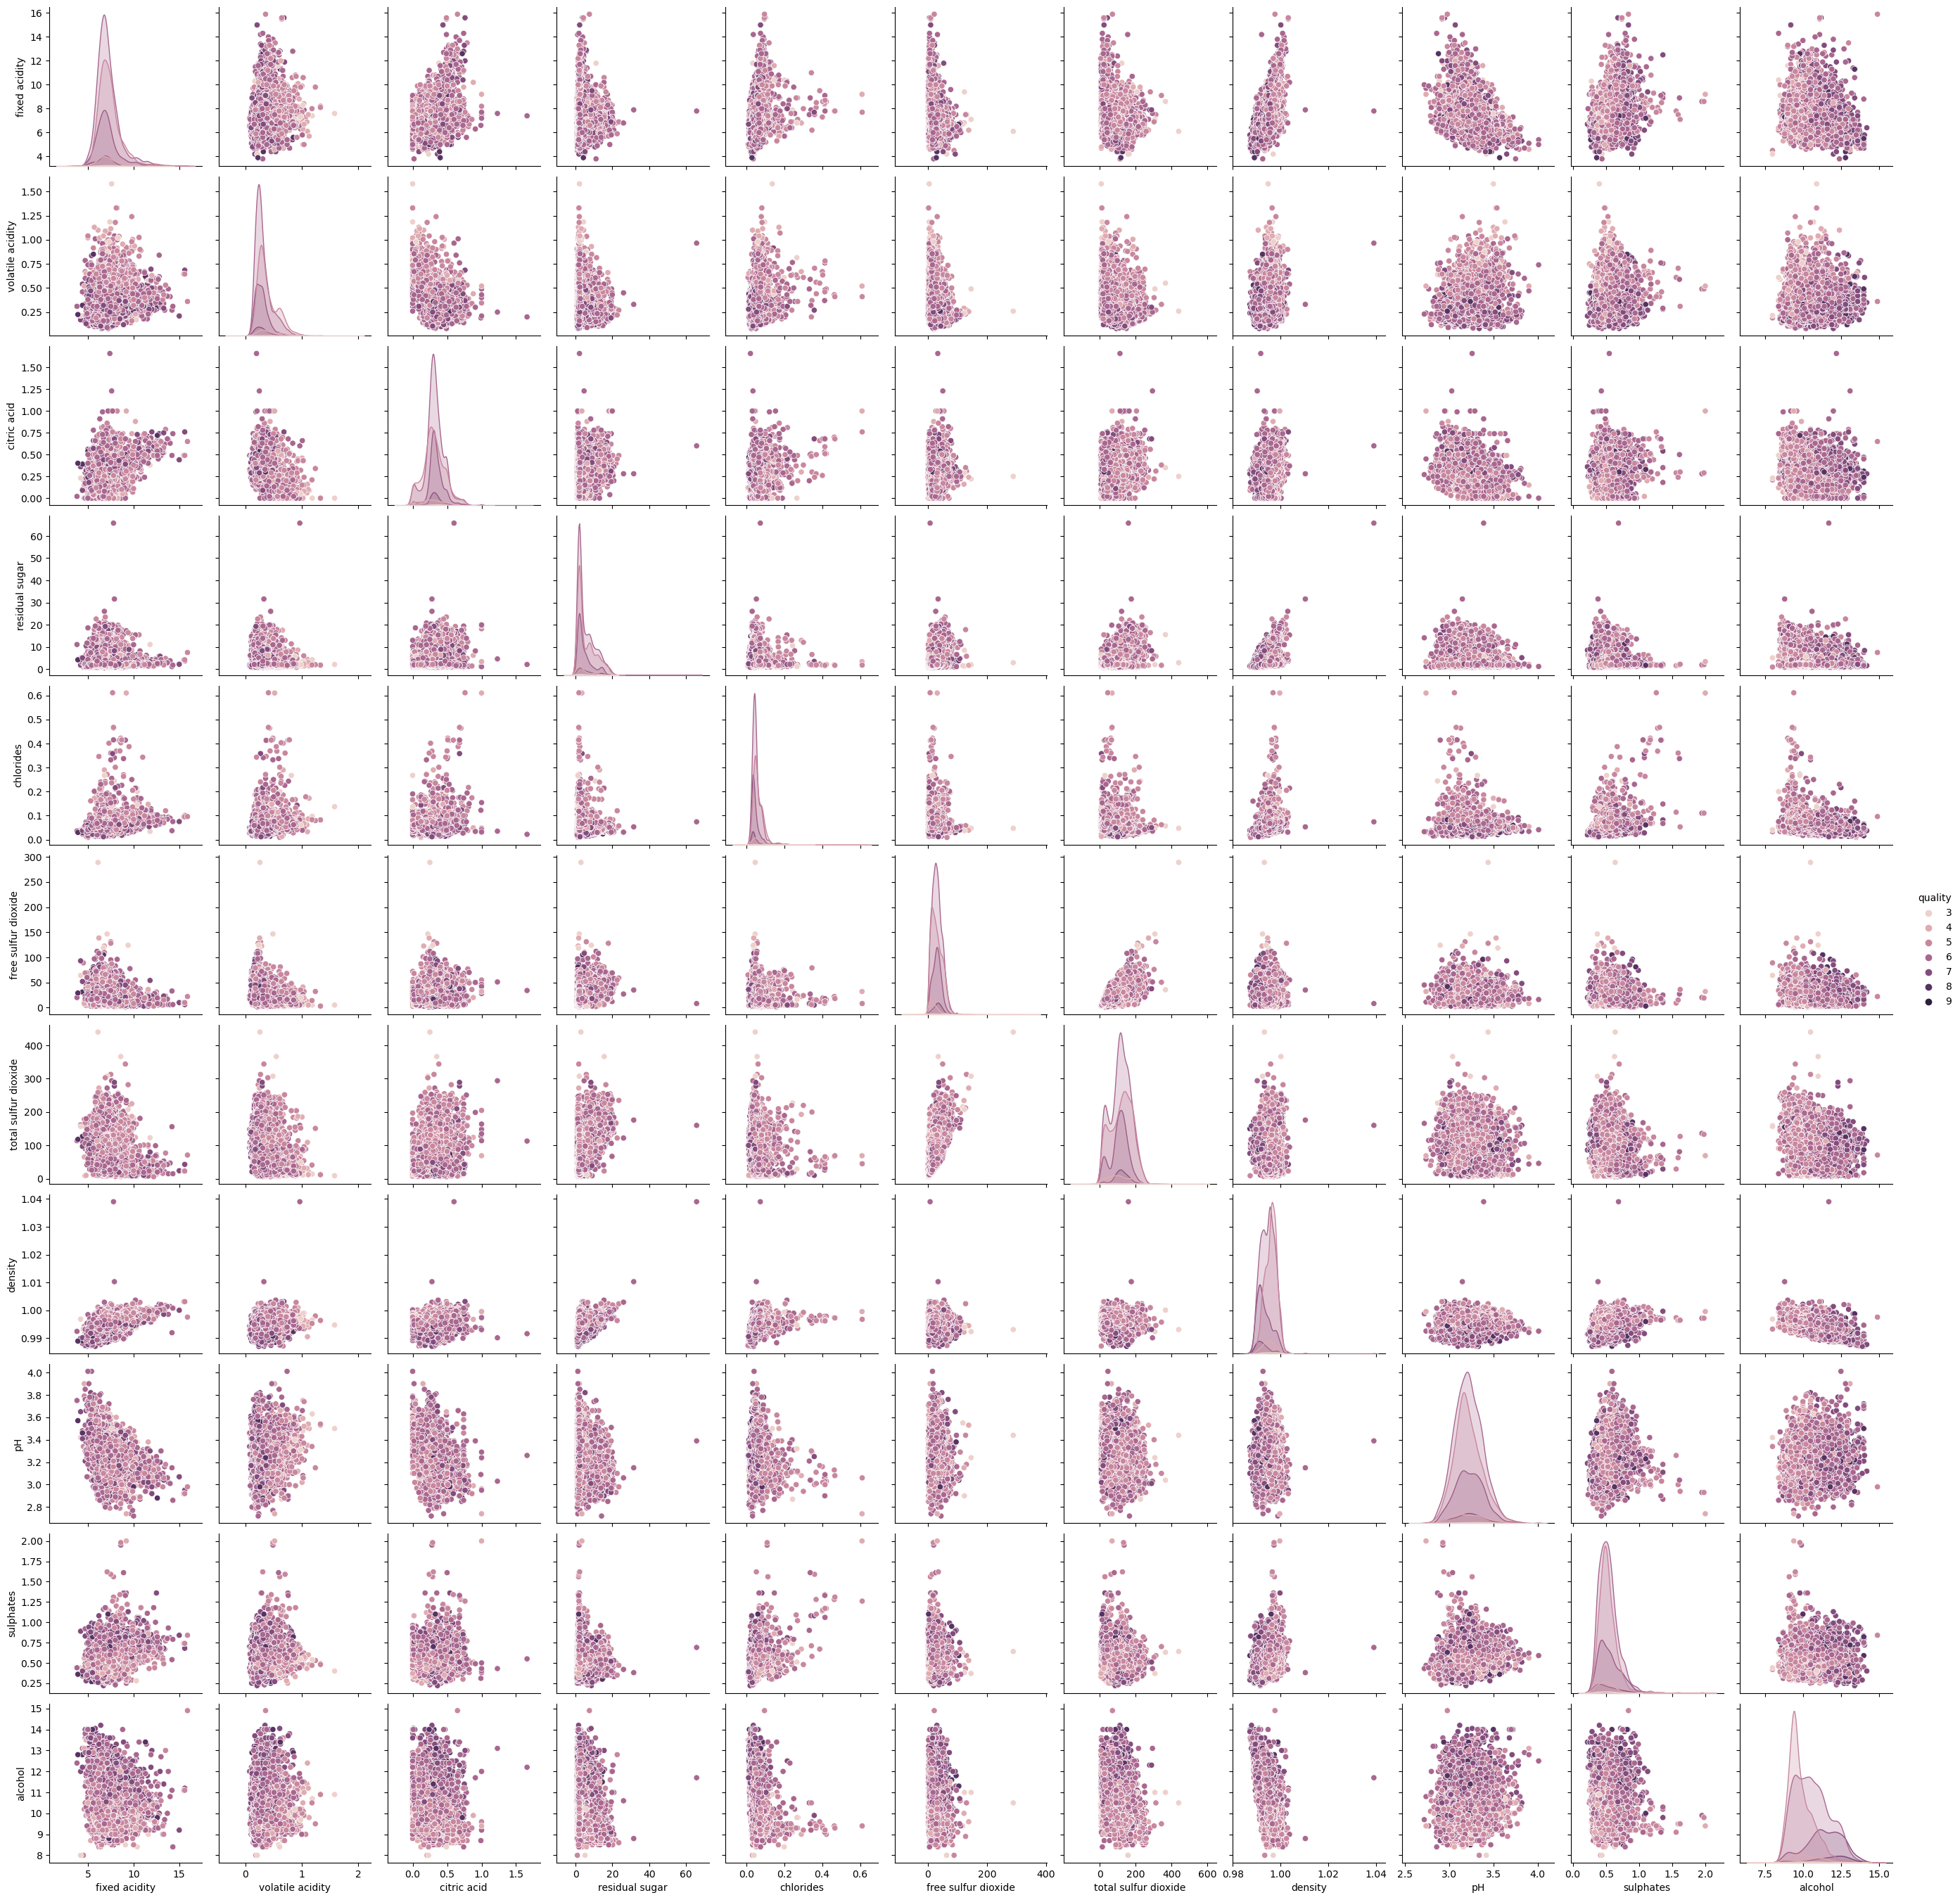

In [683]:
sns.pairplot(df, vars=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',               
'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'], hue='quality')
plt.show()

# Correlation Matrix

<Axes: >

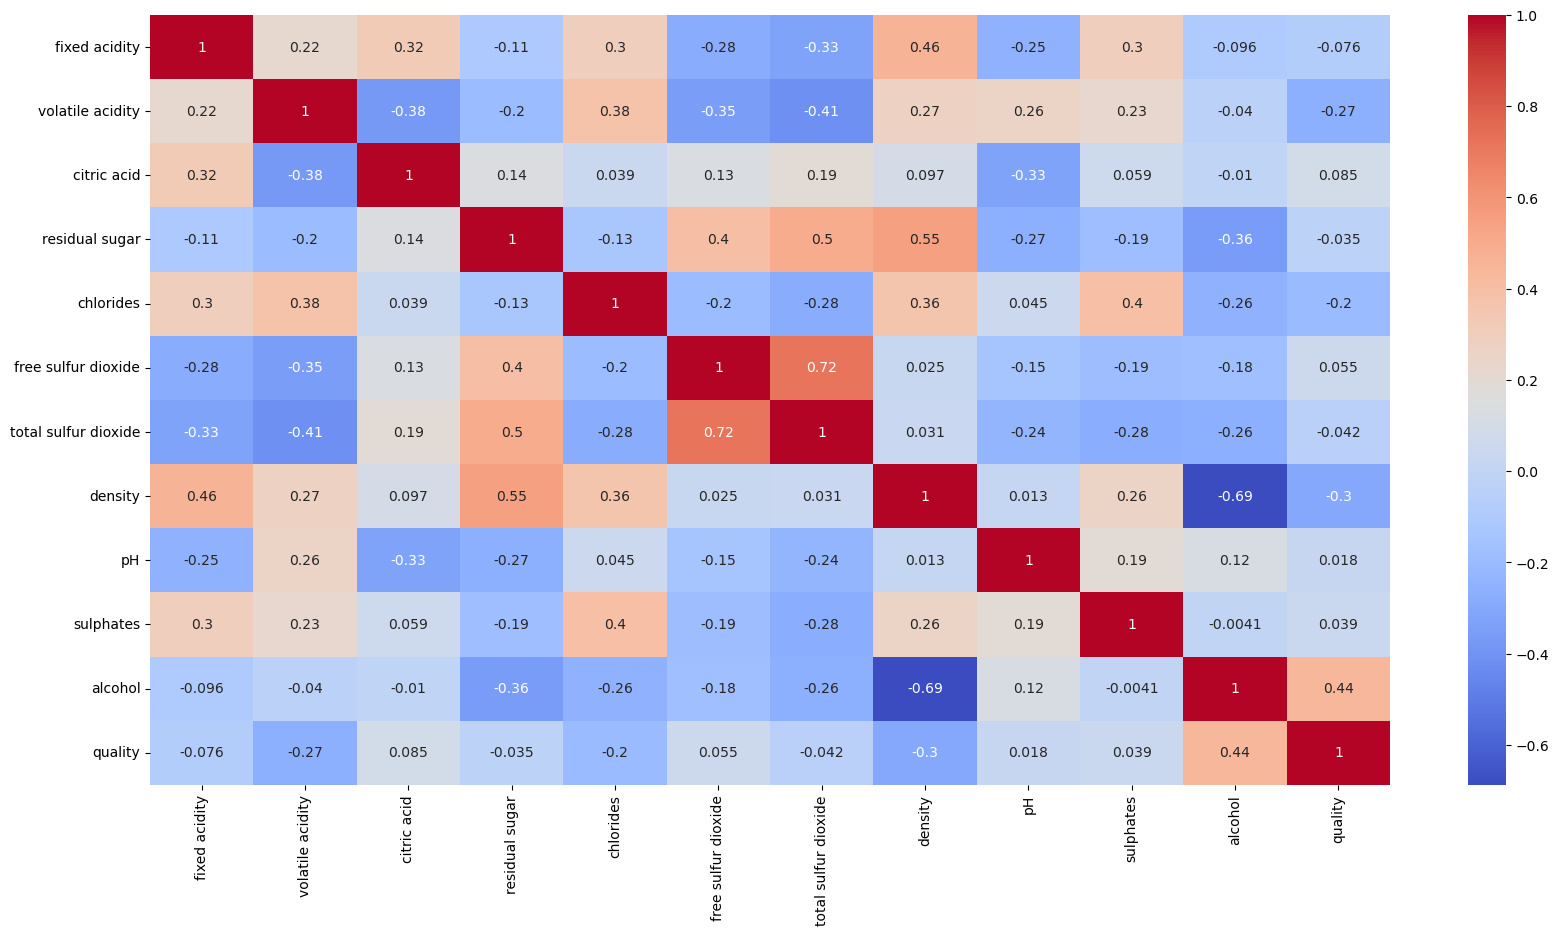

In [684]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Bottom-line Model

In [685]:
# Assuming 'quality' is the target variable and the rest are predictors
X = df.drop('quality', axis=1)  # Predictors
y = df['quality']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the bottom-line model
print(f"Bottom-line Model Accuracy: {accuracy*100}")

Bottom-line Model Accuracy: 45.86233565351895


# Transformation of Predictors

In [686]:
def transformation_model(X,y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Logistic Regression model
    logreg_model = LogisticRegression()

    # Train the model on the training data
    logreg_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = logreg_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy of the bottom-line model
    print(f"Model Accuracy: {accuracy*100}")

### First Transformation

In [687]:
# Log Transformation
df_duplicate = df.copy(deep = True)
df_duplicate['density'] = np.log(df_duplicate['density'])

<Axes: xlabel='density', ylabel='Density'>

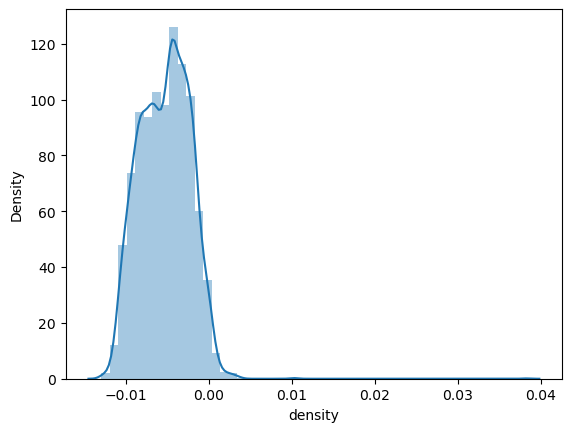

In [688]:
sns.distplot(df_duplicate['density'])

In [689]:
x = df_duplicate.drop('density', axis = 1)
y = df['quality']
transformation_model(x,y)

Model Accuracy: 68.21345707656613


### Second Transformation

In [690]:
# Log Transformation
df_duplicate = df.copy(deep = True)
df_duplicate['free sulfur dioxide'] = np.log(df_duplicate['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

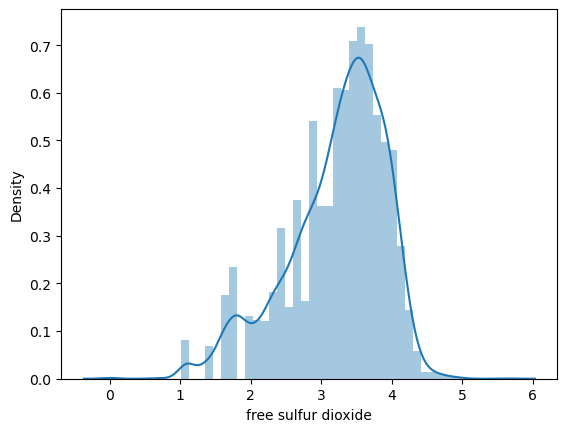

In [691]:
sns.distplot(df_duplicate['free sulfur dioxide'])

In [692]:
x = df_duplicate.drop('free sulfur dioxide', axis = 1)
y = df['quality']
transformation_model(x,y)

Model Accuracy: 66.35730858468676


### Third Transformation

In [693]:
# Log Transformation
df_duplicate = df.copy(deep = True)
df_duplicate['total sulfur dioxide'] = np.log(df_duplicate['total sulfur dioxide'])

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

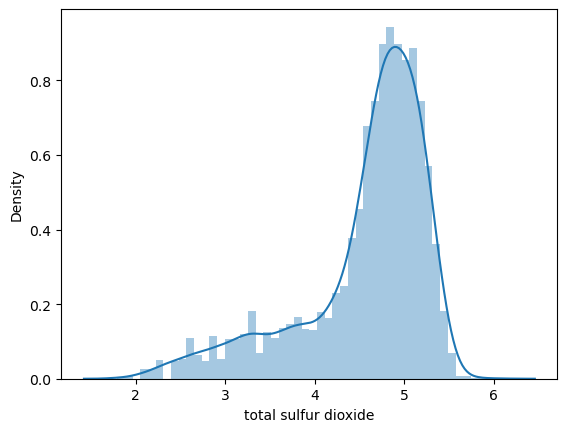

In [694]:
sns.distplot(df_duplicate['total sulfur dioxide'])

In [695]:
x = df_duplicate.drop('total sulfur dioxide', axis = 1)
y = df['quality']
transformation_model(x,y)

Model Accuracy: 84.5320959010054


### Fourth transformation

In [696]:
# Boc-Cox Transformation
df_duplicate = df.copy(deep = True)
df_duplicate['residual sugar'], lambdavalue = boxcox(df_duplicate['residual sugar'])

<Axes: xlabel='residual sugar', ylabel='Density'>

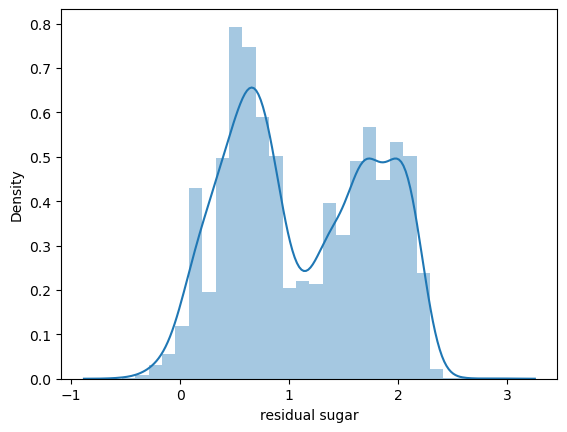

In [697]:
sns.distplot(df_duplicate['residual sugar'])

In [698]:
x = df_duplicate.drop('residual sugar', axis = 1)
y = df['quality']
transformation_model(x,y)

Model Accuracy: 70.14694508894046


### Fifth Transformation

In [699]:
# Square Root Transformation
df_duplicate = df.copy(deep = True)
df_duplicate['chlorides'] = np.sqrt(df_duplicate['chlorides'])

<Axes: xlabel='chlorides', ylabel='Density'>

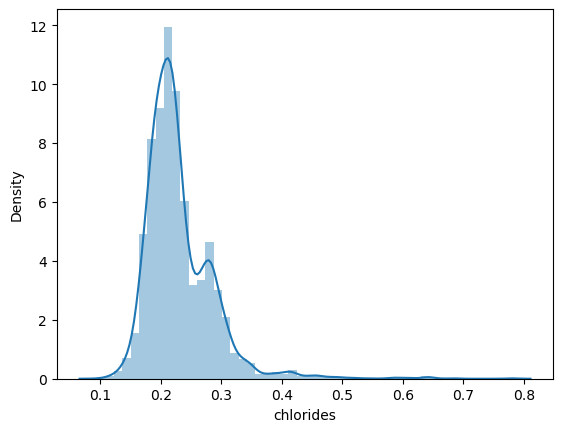

In [700]:
sns.distplot(df_duplicate['chlorides'])

In [701]:
x = df_duplicate.drop('chlorides', axis = 1)
y = df['quality']
transformation_model(x,y)

Model Accuracy: 65.58391337973704


# Feature Selection

In [702]:
def Selection_model(X,y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Logistic Regression model
    logreg_model = LogisticRegression()

    # Train the model on the training data
    logreg_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = logreg_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy of the bottom-line model
    print(f"Model Accuracy: {accuracy*100}")

In [703]:
# remove columns with greater standard deviation
columns = ['alcohol','total sulfur dioxide','free sulfur dioxide']
x = df.drop(columns , axis =1)
y = df['quality']
Selection_model(x,y)

Model Accuracy: 95.51430781129156


In [704]:
# remove Right skewed columns
columns = ['chlorides','sulphates','residual sugar']
x = df.drop(columns , axis =1)
y = df['quality']
Selection_model(x,y)

Model Accuracy: 67.98143851508121


In [705]:
# removing columns with correlation closer to 1
columns = ['fixed acidity', 'density']
x = df.drop(columns , axis =1)
y = df['quality']
Selection_model(x,y)

Model Accuracy: 69.68290796597061


In [706]:
# removing columns with correlation closer to -1
columns = ['alcohol', 'density']
x = df.drop(columns , axis =1)
y = df['quality']
Selection_model(x,y)

Model Accuracy: 69.60556844547564


In [707]:
# removing columns with lesser Standard deviation
columns = ['chlorides','density','volatile acidity']
x = df.drop(columns , axis =1)
y = df['quality']
Selection_model(x,y)

Model Accuracy: 68.2907965970611


# Conslusion

Initial Model:
The bottom-line logistic regression model provided an accuracy of approximately 45.86%. This served as the baseline for evaluating the impact of various transformations and feature selection techniques on the model's performance.

Transformations:

Log Transformation on 'Density': Improved accuracy to 68.21%.

Log Transformation on 'Free Sulfur Dioxide': Achieved an accuracy of 66.36%.

Log Transformation on 'Total Sulfur Dioxide': Showed a significant increase in accuracy to 84.53%.

Box-Cox Transformation on 'Residual Sugar': Resulted in an accuracy of 70.15%.

Square Root Transformation on 'Chlorides': Attained an accuracy of 65.58%.


Feature Selection:

Standard Deviation-Based Selection: Removing columns with higher standard deviation resulted in an impressive accuracy of 95.51%.

Right-Skewed Columns Removal: Achieved an accuracy of 67.98%.

Correlation-Based Selection (Closer to 1): Removing columns with correlation closer to 1 resulted in an accuracy of 69.68%.

Correlation-Based Selection (Closer to -1): Achieved an accuracy of 69.61%.

Standard Deviation-Based Selection (Lower Standard Deviation): Removing columns with lower standard deviation resulted in an accuracy of 68.29%.

Comparison:

The standard deviation-based feature selection method outperformed other techniques, yielding the highest accuracy of 95.51%.
Log transformations on 'Density' and 'Total Sulfur Dioxide' also significantly improved accuracy.
Box-Cox transformation on 'Residual Sugar' and square root transformation on 'Chlorides' showed moderate improvements.
Right-skewed columns removal and correlation-based selections exhibited mixed results, with accuracies ranging from 67.98% to 69.68%.

Considerations:

The choice of transformation and feature selection methods depends on the specific characteristics of the dataset and the problem at hand.
Combining multiple techniques or experimenting with different variations may further enhance model performance.
It's crucial to balance accuracy gains with interpretability and real-world applicability.

In summary, the iterative process of data preparation, transformations, and feature selection led to a variety of accuracy improvements, with the standard deviation-based feature selection method standing out as the most effective in this particular analysis. Further experimentation and fine-tuning may uncover additional insights for refining the model's predictive capabilities.